**NEU DATABASE:**

http://faculty.neu.edu.cn/yunhyan/NEU_surface_defect_database.html

Descrição do problema: 

Esta rede neural convolucional foi criada para classificar 6 tipos de falhas superficiais em chapas de aço: *rolled-in scale* (RS), *patches* (Pa), *crazing* (Cr), *pitted surface* (PS), *inclusion* (In) e *scratches* (Sc). A base de dados consiste em 1800 imagens com 300 amostras de cada tipo mais comum de falhas superficiais com resolução de 200x200 pixels, criada e disponibilizada pela *Northeastern University*. 

A dificuldade de se classificar as imagens é devido à similaridades das falhas de uma mesma família de defeitos, como os tipo *rolled-in scale*, *crazing*, e *pitted surface*. Adicionalmente, a influencia da iluminação e mudanças no material, altera os valores das cores dos pixels.

![alt text](http://faculty.neu.edu.cn/yunhyan/Webpage%20for%20article/NEU%20surface%20defect%20database/Fig.1.jpg)

# **INICIO DO ALGORITMO:**

Intalação de Bibliotecas Para Google Coolab

In [1]:
#!pip install tensorflow-gpu==2.1.0.alpha0 #only needed for google coolab notebook!
#!pip  install -q tf-nightly-2.0-preview
import zipfile
#from google.colab import drive #only needed for google coolab notebook!

import glob
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import misc
import cv2

import os.path as path
from scipy import misc
from PIL import Image
import random

Bibliotecas Para Redes Neurais

In [2]:

import datetime

#inicia tensorboard
%load_ext tensorboard

#remove todos logs de opreações anteriores
#!rm -rf ./logs/

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**LIBERA ACESSO AO GOOGLE DRIVE**

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

Diretório de arquivos para treinamento:

In [3]:
#Para Google Coolab:
#ZIP_PATH = '/content/drive/My Drive/Colab Notebooks/Data_Test/NEU - Steel Superficial Defects/NEU surface defect database.zip'
#IMAGE_PATH = '/content/drive/My Drive/Colab Notebooks/Data_Test/NEU - Steel Superficial Defects/TEMPORARIO/NEU surface defect database'

#Para windowns:
ZIP_PATH = 'C:/Users/JG/Desktop/RNA GUND/Codigo/'
IMAGE_PATH = 'C:/Users/GUND/Desktop/RNA GUND/Codigo/NEU surface defect database/'

EXTRAI ARQUIVO COMPACTADO PARA PASTA DO GOOGLE DRIVE (É NECESSÁRIO EXTRAIR SOMENTE UMA VEZ!!)

In [ ]:
!mkdir IMAGE_PATH

zip_ref = zipfile.ZipFile(ZIP_PATH, 'r')
zip_ref.extractall(IMAGE_PATH)
zip_ref.close()


Abre as imagens descompactadas previamente:

In [4]:
#Cria lista de arquivos cuja extensão seja "BMP"
file_paths = glob.glob(path.join(IMAGE_PATH, '*.bmp'))

num_imagens = len(file_paths)
num_imagens
#print(file_paths)

1800

IMPORTA AS IMAGENS CONTIDAS NA PASTA

In [5]:
img_width  = 50
img_height = 50

images = [cv2.imread(path)   for path in file_paths]

imgs_resized = [cv2.resize(image, (img_width,img_height)) for image in images ]

images = np.asarray(imgs_resized)

image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])

EXTRAI OS NOMES DAS IMAGENS PARA A CLASSIFICAÇÃO

In [6]:
#Lê os nomes das figuras
n_images = images.shape[0]
y_classes =[]
y_img_names =[]
for i in range(n_images):
    filename = path.basename(file_paths[i])[0:-4]
    y_img_names.append(filename)
    filename = path.basename(file_paths[i])[0:2]
    y_classes.append(filename)

y_img_names[156]
y_classes[156]

'Cr'

CALCULA O NÚMERO TOTAL DE CLASSES 

In [7]:
# Scale
#X_data = images / 255

#num_train, height, width, depth = images.shape 
#num_test = X_test.shape[0] 
#Há 1800 imagens, com 6 classes de falhas, cada uma com 300 fotos
num_classes = np.unique(y_classes).shape[0] 

num_classes


6

NORMALIZA TODOS OS VALORES DE CODIGOS DE CORES RGB PARA ESCALA DE 0..1

In [8]:
X_data = images
X_data = X_data.astype('float32')
X_data = X_data / 255


X_data /= np.max(X_data)

APLICA ENCODER ÀS CLASSES

In [9]:
labelencoder = LabelEncoder()

y_classes = labelencoder.fit_transform(y_classes)

Y_classes_encoded = utils.to_categorical(y_classes, num_classes) # One-hot encode the labels

In [ ]:
y_classes[1500:1510]

In [ ]:
Y_classes_encoded[1500:1510]

### **Divide a base de dados entre teste e treinamento:**





In [10]:
#test_size = percentual da base de dados destinado para testes
X_train, X_test, Y_train, Y_test = train_test_split(X_data , y_classes, test_size = 0.03, random_state = 0)
#X_train, X_test, Y_train, Y_test = train_test_split(X_data , y_classes, test_size = 0.1, random_state = 0)

Y_train_encoded = utils.to_categorical(Y_train, num_classes)
Y_test_encoded = utils.to_categorical(Y_test, num_classes)

#X_train, X_test, Y_train_encoded, Y_test_encoded = train_test_split(X_data , Y_classes_encoded, test_size = 0.03, random_state = 0)
#X_train, X_test, Y_train_encoded, Y_test_encoded = train_test_split(X_data , Y_classes_encoded, test_size = 0.03, random_state = 400)
print(Y_train[0:10])

n_training = len(X_train)
n_test = len(X_test)

[0 5 5 0 0 0 1 4 1 2]


IMPRIME PARTE DA BASE DE DADOS A SER UTILIZADA PARA TREINAMENTO

n_training =  1746
(100,)
1046


C:\Users\JG\.conda\envs\NEURAL NETWORKS\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


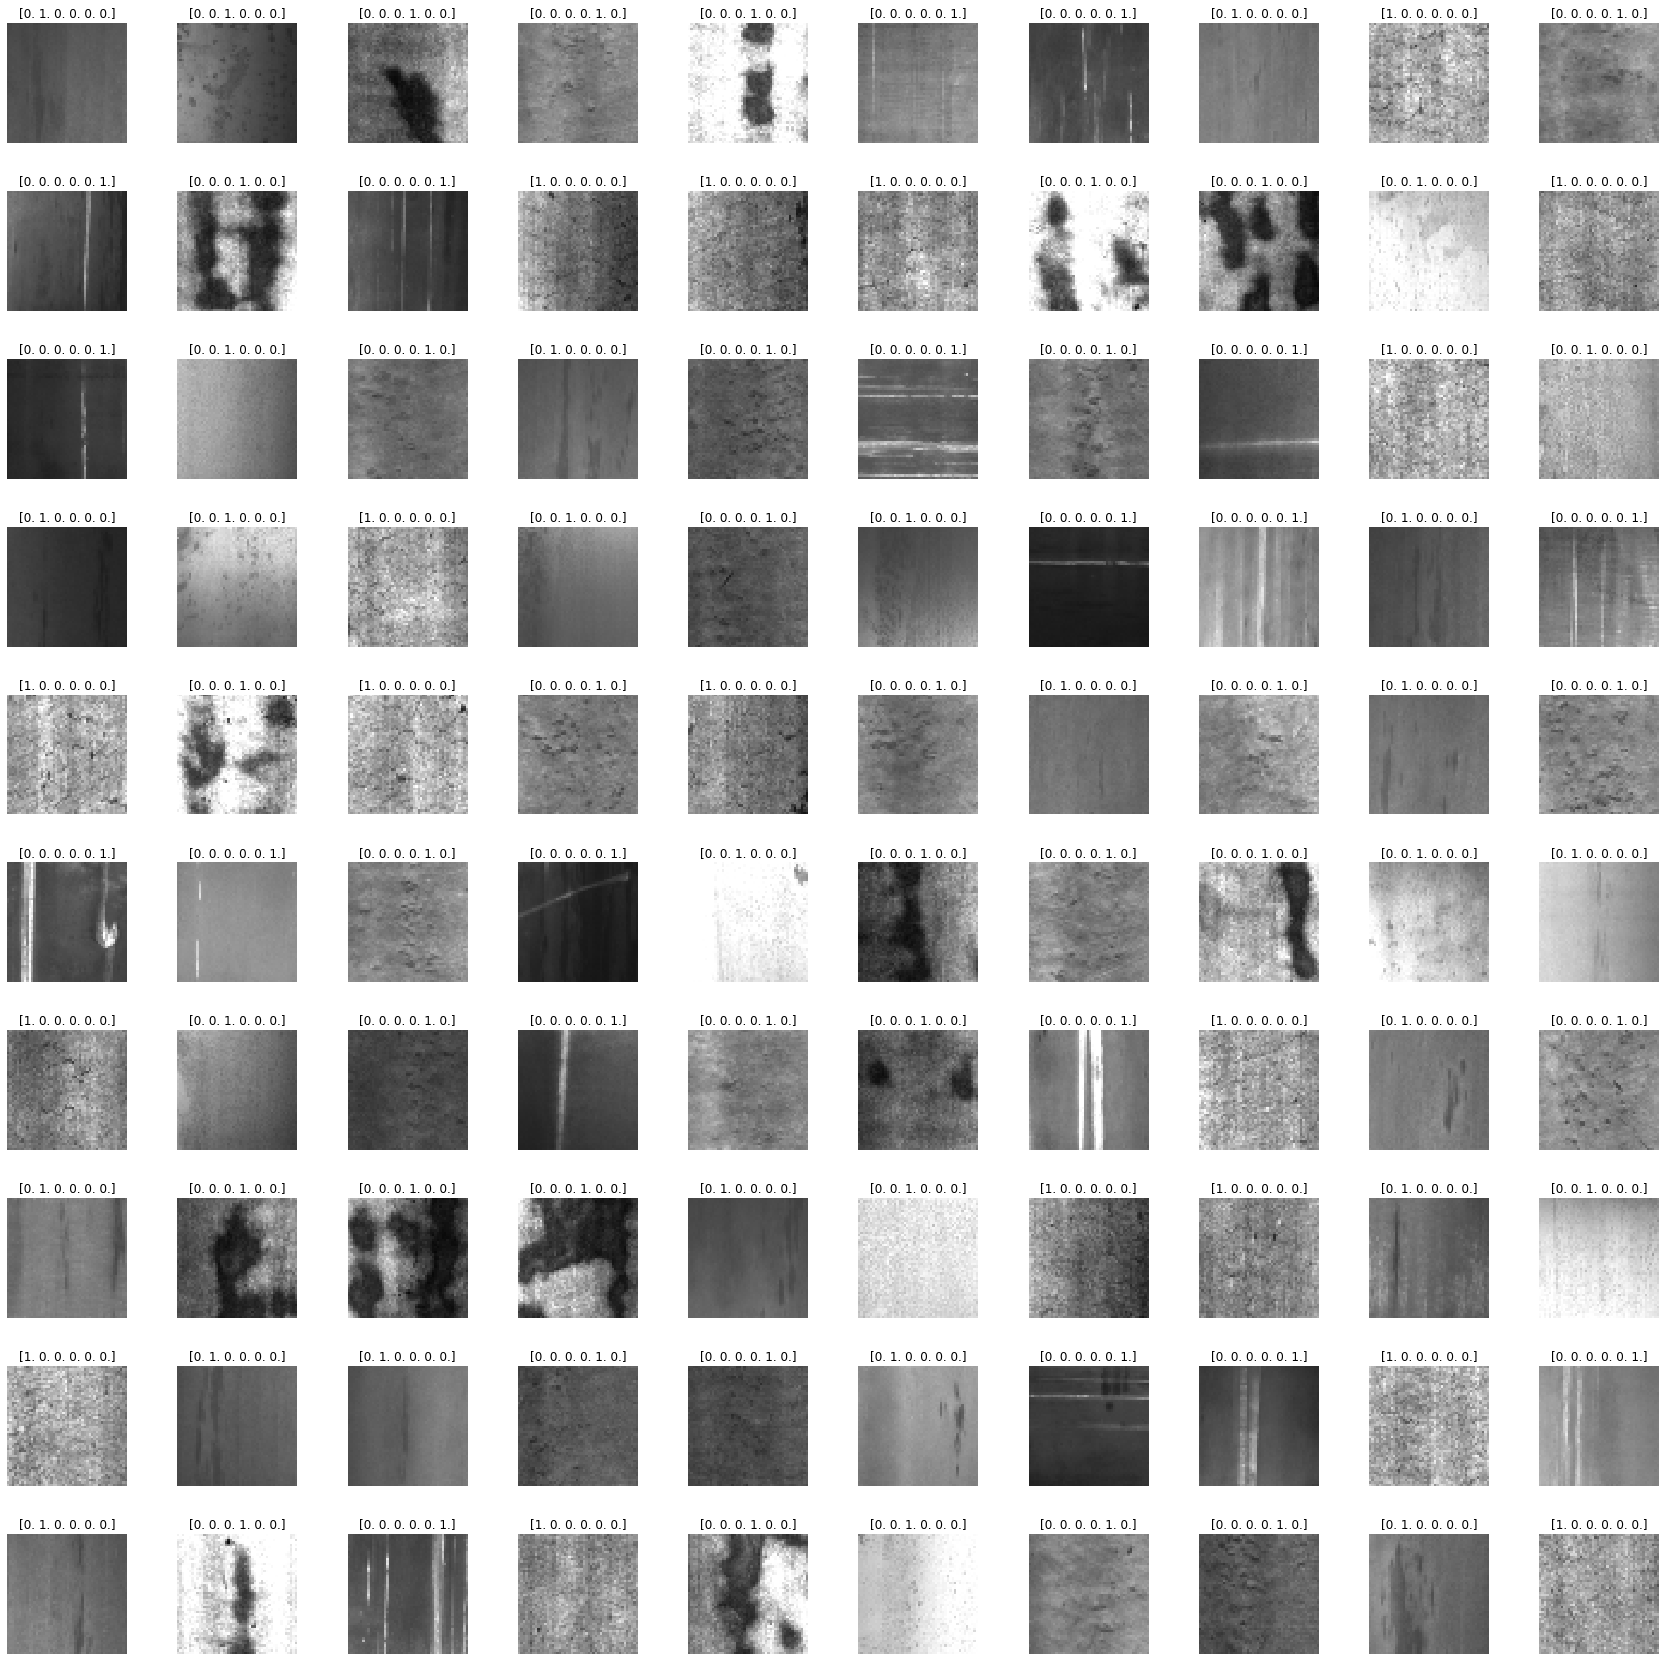

In [11]:
L_grid = 10
W_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (30,30))

axes = axes.ravel() #flatten the 28x28 image to 784 array

print("n_training = ", n_training)

index = []
#select random number from 0 to n_test

if n_training > W_grid * L_grid:
  index = random.sample(list(range(0, n_training)), (W_grid * L_grid))
  print(np.shape(index))
  print(index[0])
  for i in np.arange(0, W_grid * L_grid):
      axes[i].imshow(X_train[index[i]])
      #axes[i].set_title(y_img_names[index[i]], fontsize = 12)
      axes[i].set_title(Y_train_encoded[index[i]], fontsize = 12)
      axes[i].axis('off')
else:
  index = random.sample(list(range(0, n_training)), n_training)
  print(np.shape(index))
  print(index[0])
  for i in np.arange(0, n_training):
    axes[i].imshow(X_train[index[i]])
    #axes[i].set_title(y_img_names[index[i]], fontsize = 12)
    axes[i].set_title(Y_train_encoded[index[i]], fontsize = 12)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

IMPRIME PARTE DA BASE DE DADOS A SER UTILIZADA PARA TESTES

n_test =  54
(54,)
41


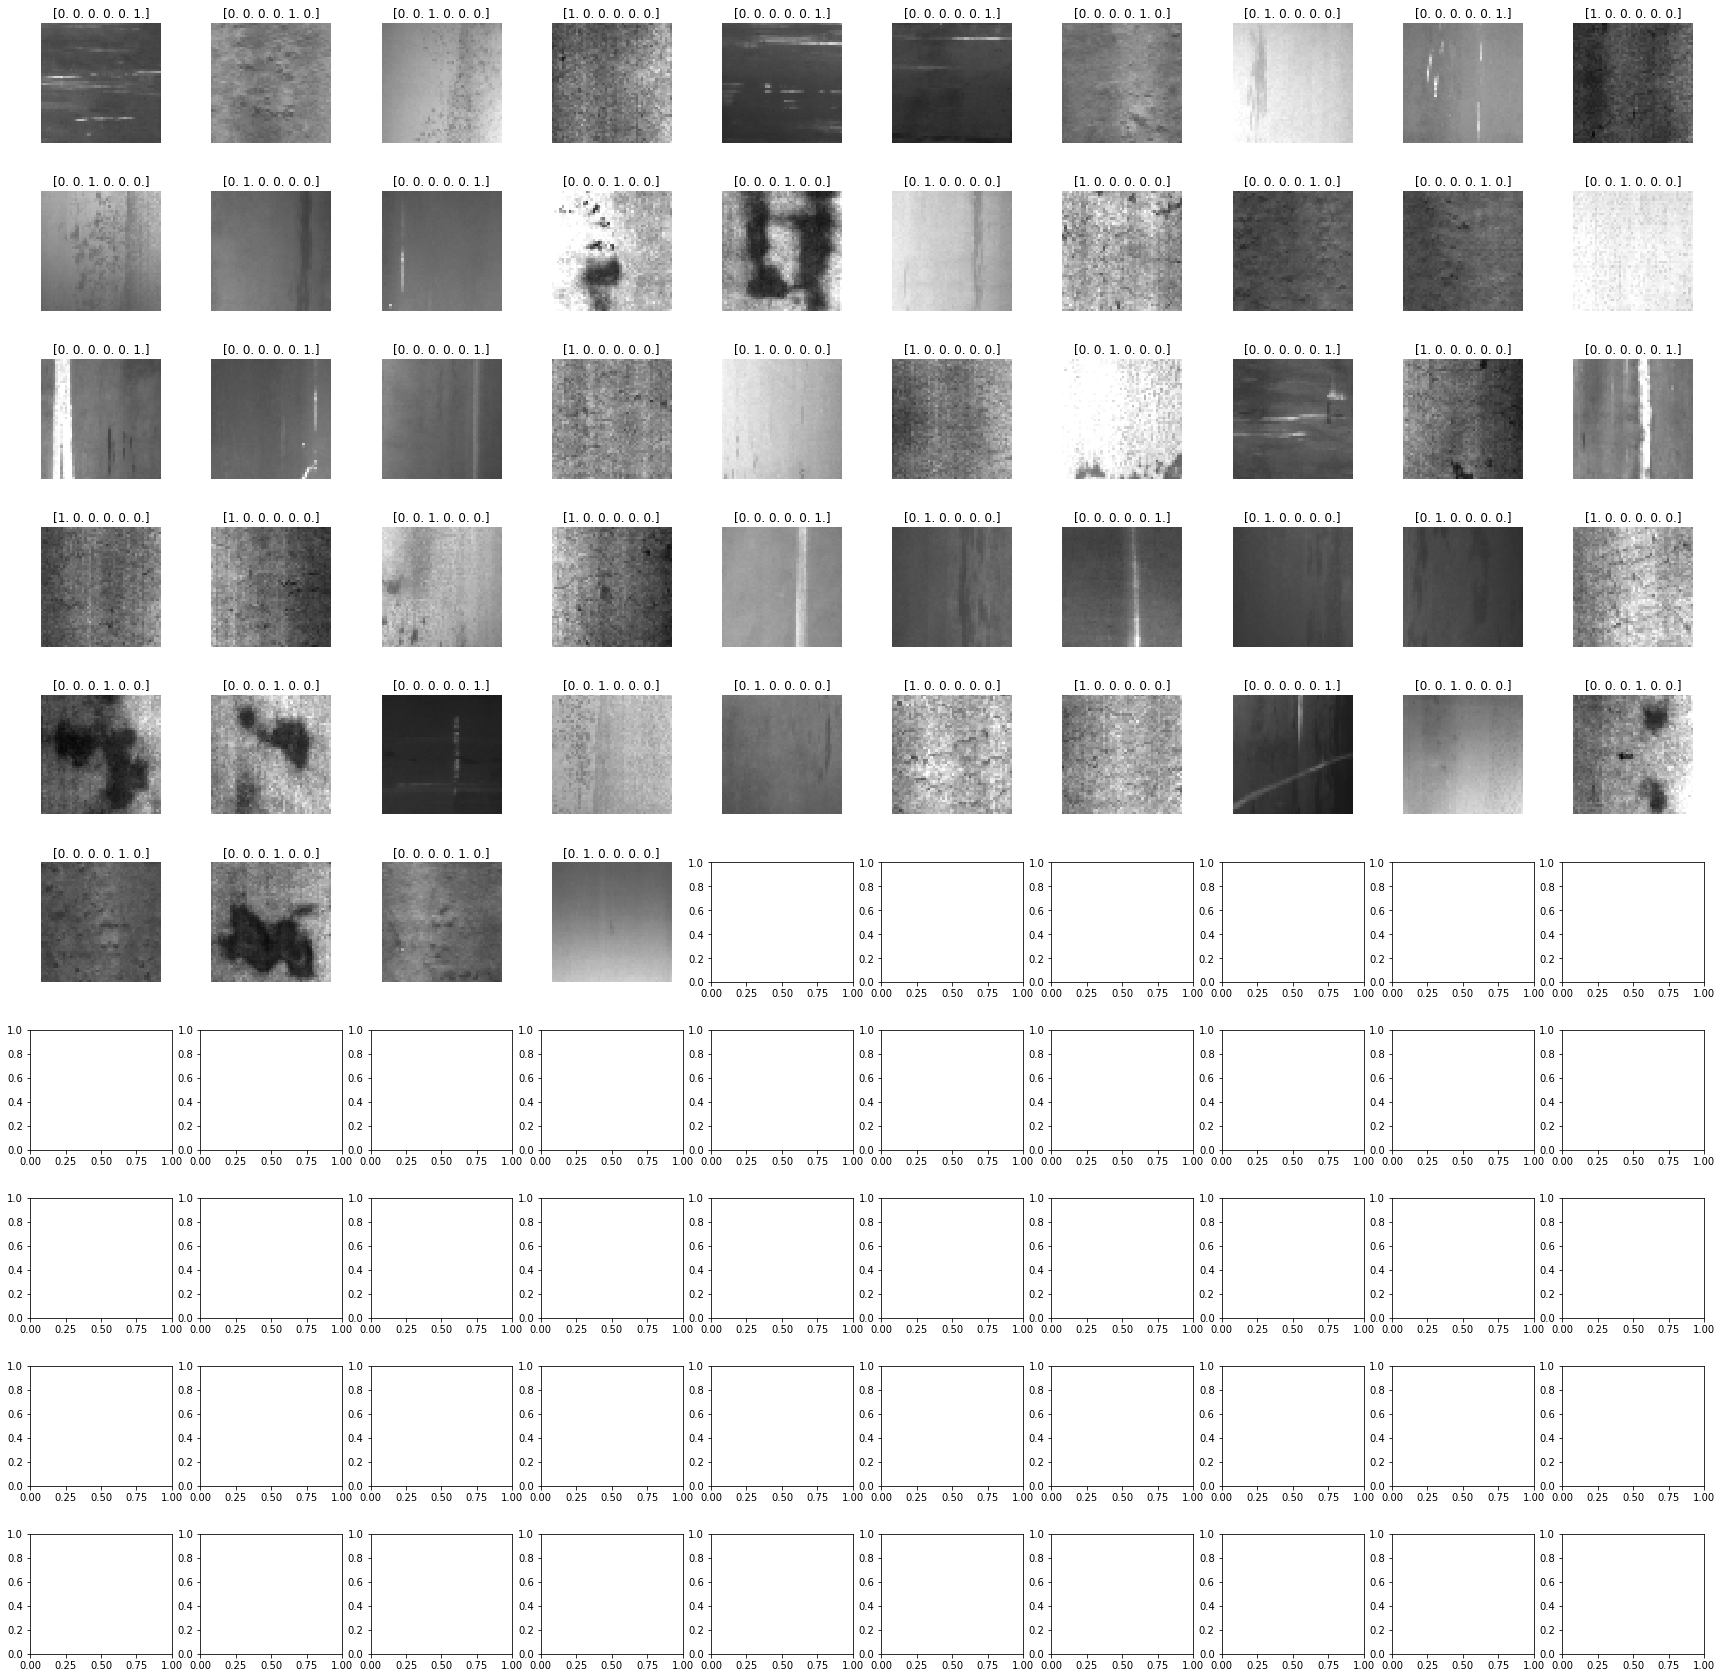

In [12]:
L_grid = 10
W_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (30,30))

axes = axes.ravel() #flatten the 28x28 image to 784 array

print("n_test = ", n_test)

index = []
#select random number from 0 to n_test



if n_test > W_grid * L_grid:

  index = random.sample(list(range(0, n_test)), (W_grid * L_grid))
  print(np.shape(index))
  print(index[0])

  for i in np.arange(0, W_grid * L_grid):
      axes[i].imshow(X_test[index[i]])
      #axes[i].set_title(y_img_names[index[i]], fontsize = 12)
      axes[i].set_title(Y_test_encoded[index[i]], fontsize = 12)
      axes[i].axis('off')
else:
  index = random.sample(list(range(0, n_test)), (n_test))
  print(np.shape(index))
  print(index[0])

  for i in np.arange(0, n_test):
    axes[i].imshow(X_test[index[i]])
    #axes[i].set_title(y_img_names[index[i]], fontsize = 12)
    axes[i].set_title(Y_test_encoded[index[i]], fontsize = 12)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

INICIALIZAÇÃO DE VARIÁVEIS:

batch_size: determines the number of samples in each mini batch. Its maximum is the number of all samples, which makes gradient descent accurate, the loss will decrease towards the minimum if the learning rate is small enough, but iterations are slower. Its minimum is 1, resulting in stochastic gradient descent: Fast but the direction of the gradient step is based only on one example, the loss may jump around. batch_size allows to adjust between the two extremes: accurate gradient direction and fast iteration. Also, the maximum value for batch_size may be limited if your model + data set does not fit into the available (GPU) memory.

steps_per_epoch: the number of batch iterations before a training epoch is considered finished. If you have a training set of fixed size you can ignore it but it may be useful if you have a huge data set or if you are generating random data augmentations on the fly, i.e. if your training set has a (generated) infinite size. If you have the time to go through your whole training data set I recommend to skip this parameter.


validation_steps: similar to steps_per_epoch but on the validation data set instead on the training data. If you have the time to go through your whole validation data set I recommend to skip this parameter.

In [22]:

#numero de registros que irá calcular antes de atualizar os pesos (batch_size)
batch_size = 100
#num_epochs = 30
num_epochs = 40
kernel_size = (3,3)
pool_size = 2 

#conv_depth_1 e conv_depth_2 -> numero de detectores (mapas) de características (kernels)
conv_depth_1 = 32
conv_depth_2 = 64

#https://timodenk.com/blog/tensorflow-batch-normalization/
drop_prob_1 = 0.5
drop_prob_2 = 0.75
drop_prob_3 = 0.7


Pooling_size_1 = (2,2)
Pooling_size_2 = (2,2)


#Chute inicial para a quantidade de neurônios: 
# ((img_width  - kernel_size + 1) / Pooling_size) ^ 2 -> ((50 - 3 + 1) / 2) ^ 2 = 576

#hidden_neurons_1 = 260
#hidden_neurons_2 = 260

hidden_neurons_1 = 128
hidden_neurons_2 = 128

** AVALIAÇÃO DE MELHORES PARÂMETROS PARA A ARQUITETURA DA REDE NEURAL**

In [12]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Cria Nova Rede Com Parâmetros Para Fazer Validação Cruzada:

In [74]:

# Define the Keras TensorBoard callback.
#logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir="logs/fit/" + "CrossValidation"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
def neural_net_steel_defects_tunning(n_dense_layers, neurons):
  
    classificador = Sequential()
 
    #1 camada de convolucao
    classificador.add(Conv2D(conv_depth_1, kernel_size, input_shape=(img_width,img_height,3),  padding='same', activation='relu'))
    #classificador.add(BatchNormalization())
    classificador.add(Conv2D(conv_depth_1, kernel_size, input_shape=(img_width,img_height,3),  padding='same', activation='relu'))
    #classificador.add(BatchNormalization())
    #Adiciona normalização à camada para aumentar a eficiencia e velocidade de processamento
    #classificador.add(BatchNormalization())
    #Aplica janela de pooling dos pixels, de tamanho 2x2
    classificador.add(MaxPooling2D(pool_size = Pooling_size_1 ))
    #dropout de 20% para ignorar pixels aleatorios da imagem visando reduzir a contribuição de pixels 
    #que não contribuem de fato com características das falhas a serem processadas
    classificador.add(Dropout(drop_prob_1))

    #2 camada de convolucao
    classificador.add(Conv2D(conv_depth_2, kernel_size, input_shape=(img_width,img_height,3),  padding='same', activation='relu'))
    #classificador.add(BatchNormalization())
    classificador.add(Conv2D(conv_depth_2, kernel_size, input_shape=(img_width,img_height,3),  padding='same', activation='relu'))
    #classificador.add(BatchNormalization())
    #Adiciona normalização à camada para aumentar a eficiencia e velocidade de processamento
    #classificador.add(BatchNormalization())
    #Aplica janela de pooling dos pixels, de tamanho 2x2
    classificador.add(MaxPooling2D(pool_size = Pooling_size_1 ))
    #dropout de 20% para ignorar pixels aleatorios da imagem visando reduzir a contribuição de pixels 
    #que não contribuem de fato com características das falhas a serem processadas
    classificador.add(Dropout(drop_prob_2))
    
    #classificador.add(BatchNormalization())
    
    classificador.add(Flatten()) 
    

    #Adiciona N camadas, para testar qual é a quantidade que causa menor erro 
    for i in range(1, n_dense_layers):
      classificador.add(Dense(units = neurons, activation='relu'))
      classificador.add(Dropout(drop_prob_3))


    classificador.add(Dense(units = num_classes, activation='softmax'))
    

    classificador.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return classificador


In [14]:
classificador_grid = KerasClassifier(build_fn = neural_net_steel_defects_tunning)

In [15]:
#Cria um "dicionario" de parametros a serem testados
#parametros_grid = { 'batch_size': [32, 100],
#                   'epochs': [30, 50, 100],
#                    'neurons': [128, 256, 576],
#                    'n_dense_layers': [1, 2 ,3]}

parametros_grid = { 'batch_size': [100],
                    'epochs': [40],
                    'neurons': [128, 260, 576],
                    'n_dense_layers': [1, 2, 3]}
                    

In [16]:
grid_search = GridSearchCV(estimator = classificador_grid, param_grid = parametros_grid, scoring = 'accuracy', cv = 5 )
#grid_search = GridSearchCV(estimator = classificador_grid, param_grid = parametros_grid, scoring = 'accuracy' )

In [17]:
y_classes
n_y = list(y_classes).count(0) #contagem de quantas vezes há a ocorrencia da classe 3...1..5..
n_y

300

In [18]:
grid_search = grid_search.fit(X_data, y_classes)
#grid_search = grid_search.fit(X_data, y_classes, validation_split=0.1)

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.6905 - accuracy: 0.2160
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6327 - accuracy: 0.2438
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5129 - accuracy: 0.3472
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.3761 - accuracy: 0.4458
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.3321 - accuracy: 0.4701
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.1214 - accuracy: 0.5854
Epoch 7/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.8916 - accuracy: 0.6674
Epoch 8/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.6478 - accuracy: 0.7583
Epoch 9/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.4436 - accuracy: 0.8597
Epoch 10/40
1440/1440 [==================

1440/1440 [==============================] - 10s 7ms/sample - loss: 0.1052 - accuracy: 0.9674
Epoch 35/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.0861 - accuracy: 0.9729
Epoch 36/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.0857 - accuracy: 0.9701
Epoch 37/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.0843 - accuracy: 0.9750
Epoch 38/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.0695 - accuracy: 0.9792
Epoch 39/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.0811 - accuracy: 0.9722
Epoch 40/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.0862 - accuracy: 0.9771
Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 11s 7ms/sample - loss: 1.7251 - accuracy: 0.2132
Epoch 2/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.6489 - accuracy: 0.2340
Epoch 3/40
1440/1440 [================

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 11s 7ms/sample - loss: 1.7023 - accuracy: 0.2028
Epoch 2/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 1.6616 - accuracy: 0.2104
Epoch 3/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.6023 - accuracy: 0.2944
Epoch 4/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.5061 - accuracy: 0.3667
Epoch 5/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.3915 - accuracy: 0.4535
Epoch 6/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.3347 - accuracy: 0.4771
Epoch 7/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.0646 - accuracy: 0.6125
Epoch 8/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.7300 - accuracy: 0.7410
Epoch 9/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.5938 - accuracy: 0.7958
Epoch 10/40
1440/1440 [===========

1440/1440 [==============================] - 9s 6ms/sample - loss: 0.1025 - accuracy: 0.9694
Epoch 39/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.1087 - accuracy: 0.9639
Epoch 40/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.1304 - accuracy: 0.9604
Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.7160 - accuracy: 0.2007
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5903 - accuracy: 0.2806
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.3008 - accuracy: 0.5097
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.8617 - accuracy: 0.6729
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.5955 - accuracy: 0.7812
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.4106 - accuracy: 0.8493
Epoch 7/40
1440/1440 [============================

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.6905 - accuracy: 0.2056
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6450 - accuracy: 0.2694
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5499 - accuracy: 0.3375
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.4270 - accuracy: 0.4181
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.3578 - accuracy: 0.4396
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.2291 - accuracy: 0.5347
Epoch 7/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.0258 - accuracy: 0.6278
Epoch 8/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.8115 - accuracy: 0.6868
Epoch 9/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.7674 - accuracy: 0.7028
Epoch 10/40
1440/1440 [==================

1440/1440 [==============================] - 9s 6ms/sample - loss: 0.1001 - accuracy: 0.9653
Epoch 39/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.1425 - accuracy: 0.9528
Epoch 40/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.1534 - accuracy: 0.9458
Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.7618 - accuracy: 0.2056
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6920 - accuracy: 0.2500
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5857 - accuracy: 0.3021
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.2471 - accuracy: 0.4840
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.8562 - accuracy: 0.6549
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.1131 - accuracy: 0.5611
Epoch 7/40
1440/1440 [============================

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.7220 - accuracy: 0.2049
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6581 - accuracy: 0.2465
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5891 - accuracy: 0.3340
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.4282 - accuracy: 0.4181
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.3106 - accuracy: 0.4868
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.1652 - accuracy: 0.5444
Epoch 7/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.0049 - accuracy: 0.6111
Epoch 8/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.9634 - accuracy: 0.6451
Epoch 9/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.8377 - accuracy: 0.6910
Epoch 10/40
1440/1440 [==================

1440/1440 [==============================] - 9s 6ms/sample - loss: 0.5687 - accuracy: 0.8236
Epoch 39/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.3869 - accuracy: 0.8778
Epoch 40/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.2819 - accuracy: 0.9132
Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.7612 - accuracy: 0.2028
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6499 - accuracy: 0.2583
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.4259 - accuracy: 0.4125
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.2657 - accuracy: 0.5007
Epoch 5/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 0.9406 - accuracy: 0.6576
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.9395 - accuracy: 0.6569
Epoch 7/40
1440/1440 [============================

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 11s 7ms/sample - loss: 1.7356 - accuracy: 0.2146
Epoch 2/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 1.6840 - accuracy: 0.2417
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6377 - accuracy: 0.2965
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5074 - accuracy: 0.3778
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.4422 - accuracy: 0.4167
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.4131 - accuracy: 0.4208
Epoch 7/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.3128 - accuracy: 0.4674
Epoch 8/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.2600 - accuracy: 0.4812
Epoch 9/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.1491 - accuracy: 0.5472
Epoch 10/40
1440/1440 [==================

1440/1440 [==============================] - 9s 6ms/sample - loss: 0.1408 - accuracy: 0.9535
Epoch 39/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 0.1685 - accuracy: 0.9438
Epoch 40/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.1404 - accuracy: 0.9493
Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.7527 - accuracy: 0.2069
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6619 - accuracy: 0.2486
Epoch 3/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 1.5042 - accuracy: 0.3722
Epoch 4/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 1.1509 - accuracy: 0.5278
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.9986 - accuracy: 0.6118
Epoch 6/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 0.8633 - accuracy: 0.6833
Epoch 7/40
1440/1440 [============================

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 11s 8ms/sample - loss: 1.7202 - accuracy: 0.2014
Epoch 2/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.5939 - accuracy: 0.2937
Epoch 3/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.4035 - accuracy: 0.4146
Epoch 4/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.0639 - accuracy: 0.5847
Epoch 5/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.8185 - accuracy: 0.6882
Epoch 6/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.5434 - accuracy: 0.8035
Epoch 7/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.4804 - accuracy: 0.8153
Epoch 8/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.5212 - accuracy: 0.8062
Epoch 9/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.4022 - accuracy: 0.8556
Epoch 10/40
1440/1440 [==========

1440/1440 [==============================] - 9s 7ms/sample - loss: 0.1352 - accuracy: 0.9535
Epoch 39/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 0.1390 - accuracy: 0.9535
Epoch 40/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 0.1131 - accuracy: 0.9618
Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.7424 - accuracy: 0.2090
Epoch 2/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 1.6160 - accuracy: 0.2917
Epoch 3/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.2556 - accuracy: 0.5236
Epoch 4/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 0.9517 - accuracy: 0.6458
Epoch 5/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 0.7179 - accuracy: 0.7549
Epoch 6/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 0.5683 - accuracy: 0.8000
Epoch 7/40
1440/1440 [===========================

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.8200 - accuracy: 0.1813
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.7537 - accuracy: 0.2118
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.7437 - accuracy: 0.2347
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.7107 - accuracy: 0.2389
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6614 - accuracy: 0.2903
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6264 - accuracy: 0.3243
Epoch 7/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6011 - accuracy: 0.3403
Epoch 8/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5823 - accuracy: 0.3611
Epoch 9/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5441 - accuracy: 0.3729
Epoch 10/40
1440/1440 [==================

1440/1440 [==============================] - 9s 6ms/sample - loss: 0.3127 - accuracy: 0.9076
Epoch 39/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.2604 - accuracy: 0.9201
Epoch 40/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.2848 - accuracy: 0.9139
Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.8248 - accuracy: 0.2042
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.7600 - accuracy: 0.2097
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.7423 - accuracy: 0.2028
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.7237 - accuracy: 0.2188
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.7203 - accuracy: 0.2403
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6883 - accuracy: 0.2347
Epoch 7/40
1440/1440 [============================

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.7577 - accuracy: 0.2201
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6960 - accuracy: 0.2201
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6348 - accuracy: 0.2708
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5776 - accuracy: 0.3243
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.5291 - accuracy: 0.3688
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.4579 - accuracy: 0.3972
Epoch 7/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.4361 - accuracy: 0.4076
Epoch 8/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.3830 - accuracy: 0.4201
Epoch 9/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.2847 - accuracy: 0.4812
Epoch 10/40
1440/1440 [==================

1440/1440 [==============================] - 9s 6ms/sample - loss: 0.2417 - accuracy: 0.9174
Epoch 39/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.2139 - accuracy: 0.9292
Epoch 40/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 0.2348 - accuracy: 0.9250
Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.7757 - accuracy: 0.1833
Epoch 2/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.6533 - accuracy: 0.2160
Epoch 3/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.4979 - accuracy: 0.2868
Epoch 4/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.4255 - accuracy: 0.3847
Epoch 5/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.3352 - accuracy: 0.4917
Epoch 6/40
1440/1440 [==============================] - 9s 6ms/sample - loss: 1.3639 - accuracy: 0.4840
Epoch 7/40
1440/1440 [============================

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 11s 7ms/sample - loss: 1.7600 - accuracy: 0.2111
Epoch 2/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.6814 - accuracy: 0.2556
Epoch 3/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.6328 - accuracy: 0.2861
Epoch 4/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.5679 - accuracy: 0.3368
Epoch 5/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.4962 - accuracy: 0.3583
Epoch 6/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.4248 - accuracy: 0.3931
Epoch 7/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.4296 - accuracy: 0.4111
Epoch 8/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.3858 - accuracy: 0.4347
Epoch 9/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.2739 - accuracy: 0.5000
Epoch 10/40
1440/1440 [==========

1440/1440 [==============================] - 10s 7ms/sample - loss: 0.1579 - accuracy: 0.9382
Epoch 39/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.4446 - accuracy: 0.8611
Epoch 40/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 0.5408 - accuracy: 0.8215
Train on 1440 samples
Epoch 1/40
1440/1440 [==============================] - 11s 8ms/sample - loss: 1.7620 - accuracy: 0.2021
Epoch 2/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.6637 - accuracy: 0.2201
Epoch 3/40
1440/1440 [==============================] - 9s 7ms/sample - loss: 1.4898 - accuracy: 0.3139
Epoch 4/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.3921 - accuracy: 0.4222
Epoch 5/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.4305 - accuracy: 0.4097
Epoch 6/40
1440/1440 [==============================] - 10s 7ms/sample - loss: 1.3116 - accuracy: 0.4542
Epoch 7/40
1440/1440 [=====================

C:\Users\GUND\.conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: A target array with shape (1440, 5) was passed for an output of shape (None, 6) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

  FitFailedWarning)


Train on 1800 samples
Epoch 1/40
1800/1800 [==============================] - 12s 7ms/sample - loss: 1.7715 - accuracy: 0.1761
Epoch 2/40
1800/1800 [==============================] - 11s 6ms/sample - loss: 1.6853 - accuracy: 0.2394
Epoch 3/40
1800/1800 [==============================] - 11s 6ms/sample - loss: 1.5806 - accuracy: 0.3233
Epoch 4/40
1800/1800 [==============================] - 11s 6ms/sample - loss: 1.4243 - accuracy: 0.4183
Epoch 5/40
1800/1800 [==============================] - 11s 6ms/sample - loss: 1.1792 - accuracy: 0.5706
Epoch 6/40
1800/1800 [==============================] - 11s 6ms/sample - loss: 0.8963 - accuracy: 0.6722
Epoch 7/40
1800/1800 [==============================] - 11s 6ms/sample - loss: 0.6916 - accuracy: 0.7639
Epoch 8/40
1800/1800 [==============================] - 11s 6ms/sample - loss: 0.4715 - accuracy: 0.8644
Epoch 9/40
1800/1800 [==============================] - 11s 6ms/sample - loss: 0.3701 - accuracy: 0.8906
Epoch 10/40
1800/1800 [==========

In [19]:
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

In [20]:
melhores_parametros 

{'batch_size': 100, 'epochs': 40, 'n_dense_layers': 1, 'neurons': 128}

In [21]:
melhor_precisao

nan

In [ ]:
%load_ext tensorboard.notebook
%tensorboard --logdir logs

### **Cria a Estrutura da Rede Neural Baseado Nos Parâmetros "Ótimos":**




In [23]:
def criar_rede_steel_defects():
    classificador = Sequential()

    classificador = Sequential()

    #1 camada de convolucao
    classificador.add(Conv2D(conv_depth_1, kernel_size, input_shape=(img_width,img_height,3),  padding='same', activation='relu'))
    #classificador.add(BatchNormalization())
    classificador.add(Conv2D(conv_depth_1, kernel_size, input_shape=(img_width,img_height,3),  padding='same', activation='relu'))
    #classificador.add(BatchNormalization())
    #Adiciona normalização à camada para aumentar a eficiencia e velocidade de processamento
    #classificador.add(BatchNormalization())
    #Aplica janela de pooling dos pixels, de tamanho 2x2
    classificador.add(MaxPooling2D(pool_size = Pooling_size_1 ))
    #dropout de 20% para ignorar pixels aleatorios da imagem visando reduzir a contribuição de pixels 
    #que não contribuem de fato com características das falhas a serem processadas
    classificador.add(Dropout(drop_prob_1))

    #2 camada de convolucao
    classificador.add(Conv2D(conv_depth_2, kernel_size, input_shape=(img_width,img_height,3),  padding='same', activation='relu'))
    #classificador.add(BatchNormalization())
    classificador.add(Conv2D(conv_depth_2, kernel_size, input_shape=(img_width,img_height,3),  padding='same', activation='relu'))
    #classificador.add(BatchNormalization())
    #Adiciona normalização à camada para aumentar a eficiencia e velocidade de processamento
    #classificador.add(BatchNormalization())
    #Aplica janela de pooling dos pixels, de tamanho 2x2
    classificador.add(MaxPooling2D(pool_size = Pooling_size_1 ))
    #dropout de 20% para ignorar pixels aleatorios da imagem visando reduzir a contribuição de pixels 
    #que não contribuem de fato com características das falhas a serem processadas
    classificador.add(Dropout(drop_prob_2))
    
    #classificador.add(BatchNormalization())
    
    classificador.add(Flatten()) 

    

    
    #1 Camada Oculta
    classificador.add(Dense(units = hidden_neurons_1, activation='relu'))
    #classificador.add(BatchNormalization())
    classificador.add(Dropout(drop_prob_2 ))
    
    

    '''
    #2 Camada Oculta
    classificador.add(Dense(units = hidden_neurons_2, activation='relu'))
    classificador.add(Dropout(drop_prob_2 ))
    
    #3 Camada Oculta
    classificador.add(Dense(units = hidden_neurons_2, activation='relu'))
    classificador.add(Dropout(drop_prob_2 ))
    '''

    classificador.add(Dense(units = num_classes, activation='softmax'))

    classificador.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return classificador

classificador_Steel_defects = criar_rede_steel_defects()


classificador_Steel_defects.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_184 (Conv2D)          (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_137 (Dropout)        (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 12, 12, 64)      

**AVALIAÇÂO DE PERFORMANCE DA REDE NEURAL COM A BASE DE DADOS**

VALIDAÇÃO CRUZADA - KFOLD (DIVIDE A BASE DE DADOS EM PARTES ESPECIFICADAS E TREINA MULTIPLAS VEZES SEPARANDO UMA PARCELA PARA TREINO E OUTRA PARA TESTES, DE MODO A ENCONTRAR A COMBINAÇÃO DE PARTES QUE MINIMIZE O ERRO. ESTA PRATICA É AMPLAMENTE UTILIZADA NO MEIO CIENTÍFICO PARA ASSEGURAR QUE NENHUMA PARTE IMPORTANTE DA BASE DE DADOS SEJA IGNORADA E INFLUENCIE SIGNIFICATIVAMENTE NA VARIÂNCIA DO MODELO TREINADO)

In [45]:
import tensorflow.keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [46]:
classificador_steel_def_KFOLD = KerasClassifier(build_fn=criar_rede_steel_defects, epochs = 40, batch_size = 100)

In [47]:
#cv -> numero de vezes que executará o teste (implica também no numero de partes que será dividida a base de dados)
resultados = cross_val_score(estimator = classificador_steel_def_KFOLD, X = X_data, y = y_classes, cv = 10, scoring = 'accuracy')

Train on 1620 samples
Epoch 1/40
1620/1620 [==============================] - 11s 7ms/sample - loss: 1.7875 - accuracy: 0.1846
Epoch 2/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.7563 - accuracy: 0.2086
Epoch 3/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.7029 - accuracy: 0.2438
Epoch 4/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.6088 - accuracy: 0.3074
Epoch 5/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.5534 - accuracy: 0.3642
Epoch 6/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.5304 - accuracy: 0.3556
Epoch 7/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.4551 - accuracy: 0.3809
Epoch 8/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.4373 - accuracy: 0.4160
Epoch 9/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.2868 - accuracy: 0.5019
Epoch 10/40
1620/1620 [==========

1620/1620 [==============================] - 10s 6ms/sample - loss: 0.1376 - accuracy: 0.9531
Epoch 39/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.1375 - accuracy: 0.9531
Epoch 40/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.1701 - accuracy: 0.9457
Train on 1620 samples
Epoch 1/40
1620/1620 [==============================] - 11s 7ms/sample - loss: 1.7617 - accuracy: 0.1975
Epoch 2/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.7059 - accuracy: 0.2179
Epoch 3/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.6277 - accuracy: 0.2772
Epoch 4/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.4977 - accuracy: 0.3512
Epoch 5/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.3215 - accuracy: 0.4414
Epoch 6/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.1850 - accuracy: 0.4932
Epoch 7/40
1620/1620 [====================

1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2332 - accuracy: 0.9265
Epoch 36/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2188 - accuracy: 0.9284
Epoch 37/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2034 - accuracy: 0.9290
Epoch 38/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2247 - accuracy: 0.9235
Epoch 39/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2370 - accuracy: 0.9123
Epoch 40/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2378 - accuracy: 0.9222
Train on 1620 samples
Epoch 1/40
1620/1620 [==============================] - 11s 7ms/sample - loss: 1.7739 - accuracy: 0.1858
Epoch 2/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.7205 - accuracy: 0.2426
Epoch 3/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 1.6744 - accuracy: 0.2870
Epoch 4/40
1620/1620 [=================

1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2435 - accuracy: 0.9198
Epoch 33/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2317 - accuracy: 0.9241
Epoch 34/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2677 - accuracy: 0.9105
Epoch 35/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2342 - accuracy: 0.9204
Epoch 36/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.1954 - accuracy: 0.9370
Epoch 37/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2210 - accuracy: 0.9198
Epoch 38/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.1794 - accuracy: 0.9401
Epoch 39/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.1814 - accuracy: 0.9370
Epoch 40/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.1789 - accuracy: 0.9377
Train on 1620 samples
Epoch 1/40
1620/1620 [==============

1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2340 - accuracy: 0.9272
Epoch 30/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2498 - accuracy: 0.9148
Epoch 31/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2502 - accuracy: 0.9074
Epoch 32/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2360 - accuracy: 0.9259
Epoch 33/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2053 - accuracy: 0.9302
Epoch 34/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2159 - accuracy: 0.9278
Epoch 35/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2423 - accuracy: 0.9080
Epoch 36/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2505 - accuracy: 0.9099
Epoch 37/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.1883 - accuracy: 0.9383
Epoch 38/40
1620/1620 [==============================] - 1

1620/1620 [==============================] - 10s 6ms/sample - loss: 0.3617 - accuracy: 0.8741
Epoch 27/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2805 - accuracy: 0.9105
Epoch 28/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2958 - accuracy: 0.8975
Epoch 29/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2598 - accuracy: 0.9111
Epoch 30/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2025 - accuracy: 0.9370
Epoch 31/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2075 - accuracy: 0.9352
Epoch 32/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2097 - accuracy: 0.9272
Epoch 33/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2884 - accuracy: 0.9031
Epoch 34/40
1620/1620 [==============================] - 10s 6ms/sample - loss: 0.2235 - accuracy: 0.9321
Epoch 35/40
1620/1620 [==============================] - 1

In [48]:
resultados

array([0.82222222, 0.99444444, 0.72777778, 0.96666667, 0.97222222,
       0.63333333, 0.84444444, 0.99444444, 0.86666667, 0.49444444])

In [49]:
resultados.mean()

0.8316666666666667

Quanto maior o valor do desvio padrão, mais overfitting há na rede neural

In [50]:
resultados.std()

0.16009352976183933

In [ ]:
y_classes[0:10]

# **SEM AUGUMENTATION:**

Roda treinamento e em seguida aplica o teste, verificando o percentual de acerto (val_accuracy):

*quanto maior o "val_accuracy" e menor é o valor do "val_loss", obtidos a partir da base de dados de teste, melhor é a capacidade de generalização da rede

In [24]:
epochs_hist = classificador_Steel_defects.fit(X_train, Y_train_encoded, steps_per_epoch = round(n_training / batch_size),
          batch_size=batch_size, epochs=num_epochs,
          validation_data=(X_test, Y_test_encoded))


Train on 1746 samples, validate on 54 samples
Epoch 1/40
1646/1746 [===========================>..] - ETA: 0s - loss: 0.1959 - accuracy: 0.9386 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

In [25]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

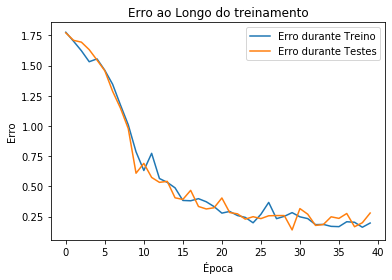

In [26]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Erro ao Longo do treinamento')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend(['Erro durante Treino', 'Erro durante Testes'])

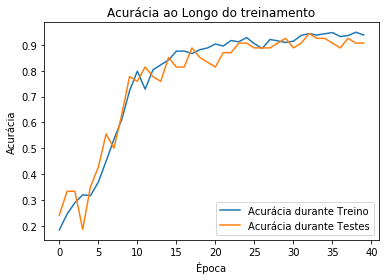

In [27]:
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title('Acurácia ao Longo do treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Acurácia durante Treino', 'Acurácia durante Testes'])

In [28]:
# get the predictions for the test data
predicted_classes = classificador_Steel_defects.predict_classes(X_test)

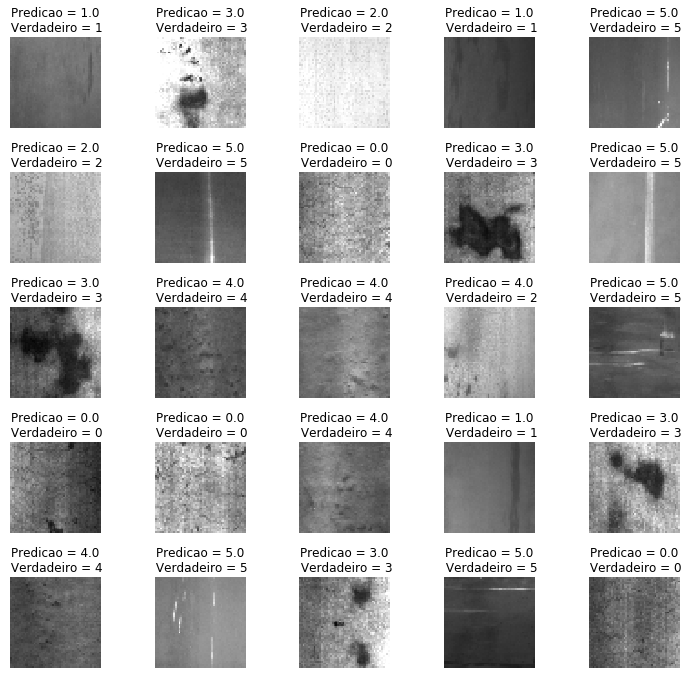

In [29]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Predicao = {:0.1f}\n Verdadeiro = {}".format(predicted_classes[i], Y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.6)

### **COM "AUGUMENTATION": cria novas entradas de "imagens" a partir das existentes, rotacionando, "esticando", invertendo...**

In [223]:
#For use in google coolab
# Define the Keras TensorBoard callback.
#logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#logdir="logs/fit/" + "Augumentation"



#For use in Windows?
'''
logs_base_dir = "./logs/fit/Augumentation"

os.makedirs(logs_base_dir, exist_ok=True)
os.join.path()

'''

logdir = './logs/fit/'


if not os.path.exists(logdir):
    os.mkdir(logdir)
dir_augumentation = os.path.join(logdir, "Augumentation")

#%tensorboard --logdir {logs_base_dir}
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=dir_augumentation, profile_batch = 100000000)


In [32]:
gerador_treinamento = ImageDataGenerator(rotation_range= 7, horizontal_flip=True, shear_range=0.2, height_shift_range=0.07, zoom_range=0.2)

Augumentation com variação de luminosidade:

In [33]:
gerador_treinamento = ImageDataGenerator(rotation_range= 7, horizontal_flip=True, shear_range=0.2, height_shift_range=0.07, zoom_range=0.2, brightness_range=[0.2,1.0])


In [34]:
gerador_teste = ImageDataGenerator()

In [35]:
#base_treinamento = gerador_treinamento.flow(X_train, Y_train_encoded, batch_size = batch_size )
gerador_treinamento.fit(X_train)
base_treinamento = gerador_treinamento.flow(X_train, Y_train_encoded, batch_size = batch_size )

In [36]:
#base_teste = gerador_teste.flow(X_test, Y_test_encoded, batch_size = batch_size)
gerador_teste.fit(X_test)
base_teste = gerador_teste.flow(X_test, Y_test_encoded, batch_size = batch_size)


In [38]:
#steps_per_epoch -> numero total de etapas/lotes de amostras a serem geradas pelo gerador antes de declarar uma época concluída. Coca-se a quantidade de imagens que temos, dividido pelo batch size
#classificador.fit_generator(base_treinamento, steps_per_epoch= 600000 / 128, epochs = 5, validation_data = base_teste, validation_steps= 10000 / 128)
#epochs_hist_augumentation = classificador_Steel_defects.fit_generator(base_treinamento, steps_per_epoch = num_imagens / batch_size, epochs = num_epochs, validation_data = base_teste, validation_steps= 10000 / batch_size)
#epochs_hist_augumentation = classificador_Steel_defects.fit_generator(base_treinamento, steps_per_epoch = num_imagens / 2, epochs = num_epochs, validation_data = base_teste, validation_steps= 1000 )
#epochs_hist_augumentation = classificador_Steel_defects.fit_generator(datagen.flow(X_train, Y_train_encoded, batch_size = batch_size), steps_per_epoch = n_training / batch_size, epochs = 2,  validation_data = base_teste)
epochs_hist_augumentation = classificador_Steel_defects.fit_generator(base_treinamento, steps_per_epoch = round(n_training / batch_size), epochs = 20,  validation_data = base_teste)



Epoch 1/20
17/17 [==============================] - 20s 1s/step - loss: 13.4735 - accuracy: 0.1665 - val_loss: 11.9393 - val_accuracy: 0.2593
Epoch 2/20
17/17 [==============================] - 20s 1s/step - loss: 13.4409 - accuracy: 0.1659 - val_loss: 11.9393 - val_accuracy: 0.2593
Epoch 3/20
17/17 [==============================] - 20s 1s/step - loss: 13.4884 - accuracy: 0.1628 - val_loss: 11.9393 - val_accuracy: 0.2593
Epoch 4/20
17/17 [==============================] - 20s 1s/step - loss: 13.4874 - accuracy: 0.1622 - val_loss: 11.9393 - val_accuracy: 0.2593
Epoch 5/20
17/17 [==============================] - 20s 1s/step - loss: 13.6394 - accuracy: 0.1525 - val_loss: 11.9393 - val_accuracy: 0.2593
Epoch 6/20
17/17 [==============================] - 20s 1s/step - loss: 13.2699 - accuracy: 0.1768 - val_loss: 11.9393 - val_accuracy: 0.2593
Epoch 7/20
17/17 [==============================] - 20s 1s/step - loss: 13.5771 - accuracy: 0.1576 - val_loss: 11.9393 - val_accuracy: 0.2593
Epoch 

com callback para tensorboard:

In [ ]:
#steps_per_epoch -> numero total de etapas/lotes de amostras a serem geradas pelo gerador antes de declarar uma época concluída. Coca-se a quantidade de imagens que temos, dividido pelo batch size
epochs_hist_augumentation = classificador_Steel_defects.fit_generator(base_treinamento, steps_per_epoch = n_training / batch_size, epochs = 10,  validation_data = base_teste,  callbacks=[tensorboard_callback])


In [ ]:
#Para google coolab:
#%load_ext tensorboard.notebook

#Para windows:
%load_ext tensorboard


%tensorboard --logdir dir_augumentation




In [39]:
epochs_hist_augumentation.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

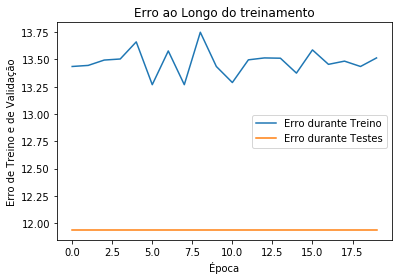

In [40]:
plt.plot(epochs_hist_augumentation.history['loss'])
plt.plot(epochs_hist_augumentation.history['val_loss'])
plt.title('Erro ao Longo do treinamento')
plt.xlabel('Época')
plt.ylabel('Erro de Treino e de Validação')
plt.legend(['Erro durante Treino', 'Erro durante Testes'])

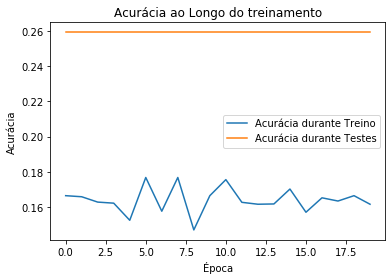

In [41]:
plt.plot(epochs_hist_augumentation.history['accuracy'])
plt.plot(epochs_hist_augumentation.history['val_accuracy'])
plt.title('Acurácia ao Longo do treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Acurácia durante Treino', 'Acurácia durante Testes'])

In [80]:
# get the predictions for the test data
predicted_classes = classificador_Steel_defects.predict_classes(X_test)

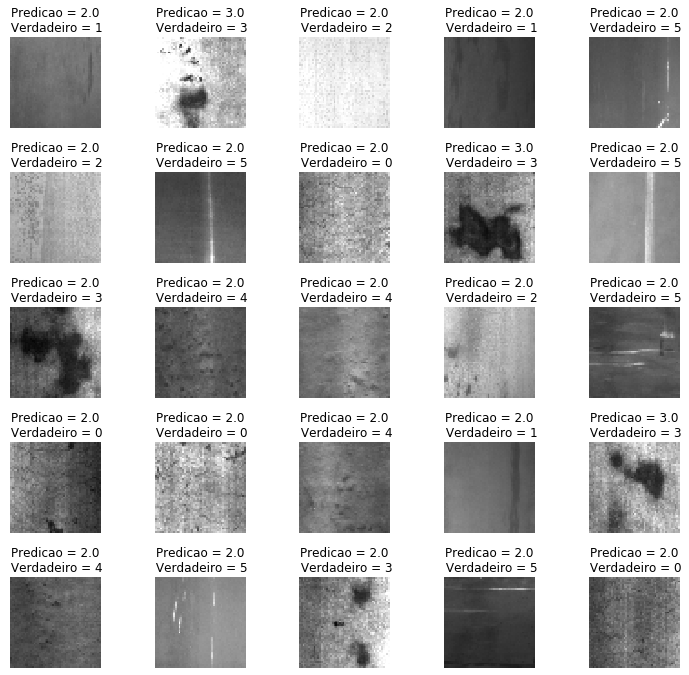

In [81]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Predicao = {:0.1f}\n Verdadeiro = {}".format(predicted_classes[i], Y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.6)